In [1]:
!pip install -q pypdf
!pip install -q python-dotenv
!pip install -q llama-index
!pip install -q gradio
!pip install einops
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.1/212.1 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow-probability 0.22.0 requires ty

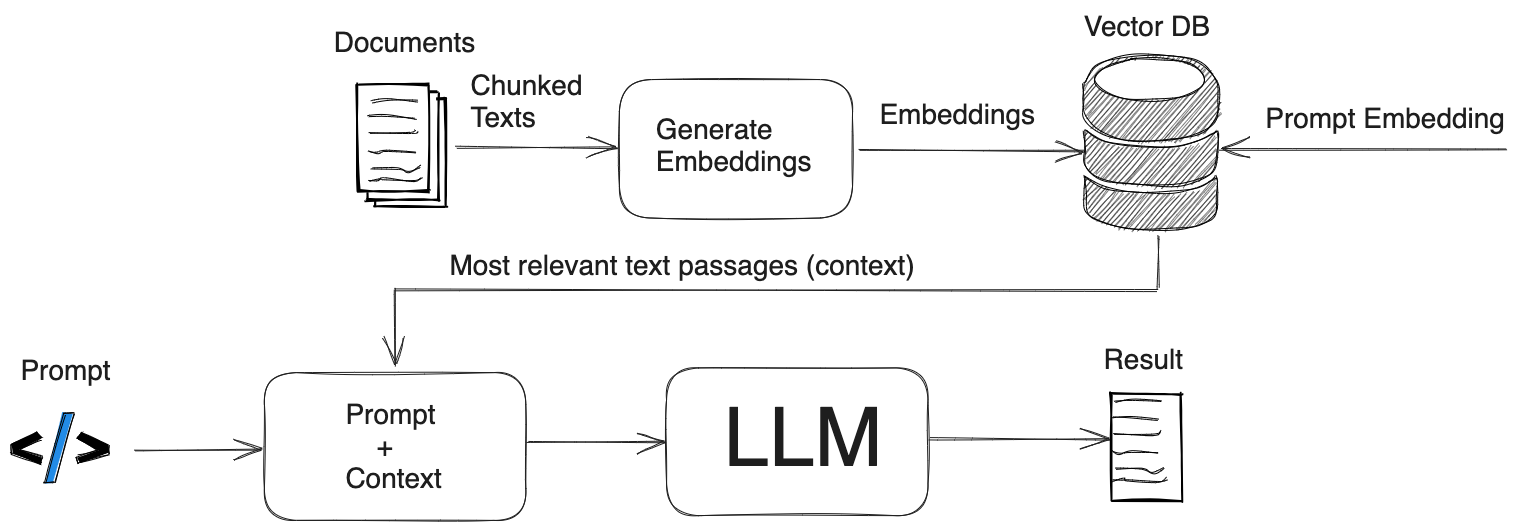

In [10]:
from llama_index import VectorStoreIndex, SimpleDirectoryReader, ServiceContext
from llama_index.llms import HuggingFaceLLM
import torch

In [11]:
documents = SimpleDirectoryReader("/content/").load_data()

In [12]:
len(documents)

102

In [13]:
documents[10]

Document(id_='ded17e0b-2737-4460-a025-16ddc7a61cba', embedding=None, metadata={'page_label': '11', 'file_name': 'data science interview preparation guide.pdf', 'file_path': '/content/data science interview preparation guide.pdf', 'file_type': 'application/pdf', 'file_size': 9956934, 'creation_date': '2024-01-15', 'last_modified_date': '2024-01-15', 'last_accessed_date': '2024-01-15'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, hash='019ae2c4a6b512f7c98b6181cb917976828387408f4bf918963f83e2a81d5a72', text="Students think the resume is nothing more than a\npiece of paper and they do all the mistakes while\nmaking the resume, as a result, their resume doesn't\nget shortlisted and they never get a chance to\ninterview around. Thus, they think taking a job is t

In [14]:
from llama_index.prompts.prompts import SimpleInputPrompt

system_prompt = "You are a QA bot. Given the questions answer it correctly."

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")

In [16]:
llm = HuggingFaceLLM(
    context_window=2048,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    model_name="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    device_map="cuda",
    # uncomment this if using CUDA to reduce memory usage
    model_kwargs={"torch_dtype": torch.bfloat16},
)


In [17]:
from llama_index.embeddings import HuggingFaceEmbedding

embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    embed_model=embed_model
)



In [18]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)

query_engine = index.as_query_engine()

def predict(input, history):
  response = query_engine.query(input)
  return str(response)


In [19]:
import gradio as gr
gr.ChatInterface(predict).launch(share=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>